In [24]:
# understand tensors
import tensorflow as tf

tf.reset_default_graph()

# Define a placeholder
a = tf.placeholder("float", name='pholdA')  
print("a:", a)

# Define a variable 
b = tf.Variable(2.0, name='varB')  
print("b:", b)

# Define a constant
c = tf.constant([1., 2., 3., 4.], name='consC')  
print("c:", c)  

a: Tensor("pholdA:0", dtype=float32)
b: <tf.Variable 'varB:0' shape=() dtype=float32_ref>
c: Tensor("consC:0", shape=(4,), dtype=float32)


In [25]:
d = a * b + c
d

<tf.Tensor 'add:0' shape=<unknown> dtype=float32>

In [26]:
# call the default graph
graph = tf.get_default_graph()

# print operations in the graph
for op in graph.get_operations():  
    print(op.name)

pholdA
varB/initial_value
varB
varB/Assign
varB/read
consC
mul
add


In [27]:
# Initialize variables
init = tf.global_variables_initializer()

# Run a session and calculate d
sess = tf.Session()  
sess.run(init)  
print(sess.run(d, feed_dict={a: [[0.5], [2], [3]]}))  
sess.close()

[[  2.   3.   4.   5.]
 [  5.   6.   7.   8.]
 [  7.   8.   9.  10.]]


In [16]:
# Import the needed libraries
import numpy as np  
import pandas as pd  
import tensorflow as tf  
import urllib.request as request  
import matplotlib.pyplot as plt

# Download dataset
IRIS_TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"  
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']  
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=1)  
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=1)

# Train and test input data
Xtrain = train.drop("species", axis=1)  
Xtest = test.drop("species", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.species)  
ytest = pd.get_dummies(test.species)  

In [17]:
tf.reset_default_graph()

# Placeholders for input and output data
X = tf.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
X

<tf.Tensor 'X:0' shape=(120, 4) dtype=float64>

In [18]:
X[0]

<tf.Tensor 'strided_slice:0' shape=(4,) dtype=float64>

In [19]:
# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(120, 3), dtype=tf.float64, name='y')

    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(4, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 3), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)

    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

loss (hidden nodes: 5, iterations: 2000): 7.32
loss (hidden nodes: 10, iterations: 2000): 35.33
loss (hidden nodes: 20, iterations: 2000): 10.25


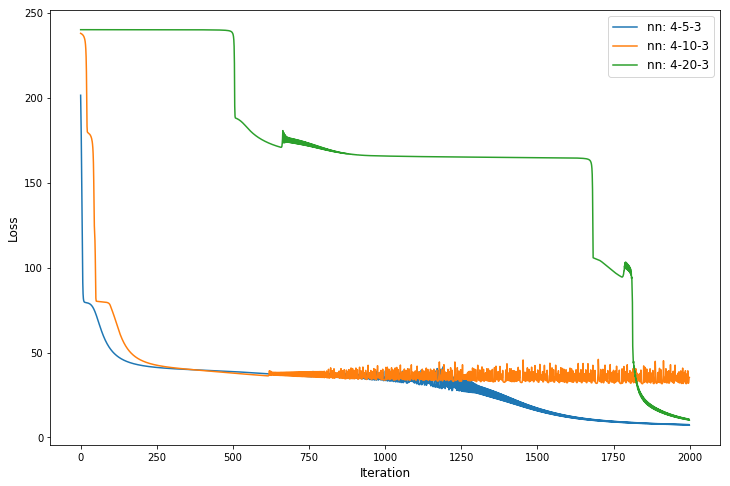

In [20]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations
num_hidden_nodes = [5, 10, 20]  
loss_plot = {5: [], 10: [], 20: []}  
weights1 = {5: None, 10: None, 20: None}  
weights2 = {5: None, 10: None, 20: None}  
num_iters = 2000

plt.figure(figsize=(12,8))  
for hidden_nodes in num_hidden_nodes:  
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 

In [21]:
# Plot the loss function over iterations
num_hidden_nodes = [5, 10, 20]  
loss_plot = {5: [], 10: [], 20: []}  
weights1 = {5: None, 10: None, 20: None}  
weights2 = {5: None, 10: None, 20: None}  
num_iters = 2000

In [22]:
# Evaluate models on the test set
X = tf.placeholder(shape=(30, 4), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

In [23]:
for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))

ValueError: initial_value must be specified.